#  Problem Description

## Big Mart Product Outlet Sales Mini Project

###### "Task": main goal is to try to understand the properties of products and stores which play a key role in increasing sales. 

### Specification and Requirements:
- Carry out exploratory data analysis
- Identify properties which increase sales
- Test statistical hypotheses

###### "Description of the data:"
dataset consists of 2013 sales data for 1559 products across 10 stores in different cities. it contains the following columns:

"Item_Identifier"    ـــ Item Identifier

"Item_Weight"        ـــ the product's weight 

"Item_Fat_Content"   ـــ product's fat content

"Item_Visibility"    ـــ percent of product's displaying area

"Item_Type"          ـــ product's category

"Item_MRP"           ـــ maximum retail price

"Outlet_Identifier"  ـــ Store's identifier

"Outlet_Size"        ـــ Store's size

"Outlet_Location_Type" ـــ store's location type

"Outlet_Type"          ـــ store's type

"Item_Outlet_Sales"    ـــ target column




##### Importing Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder 

##### Loading Data


In [2]:
train = pd.read_csv("BMPO_train.csv")
test=pd.read_csv("BMPO_test.csv")

In [3]:
print('The tarin data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print('-----------------------------------')
print('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The tarin data has 8523 rows and 12 columns
-----------------------------------
The test data has 5681 rows and 11 columns


##### Basic Data Exploration

In [4]:
# print first 5 rows
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# check info bout data and the datatypes of each respective attribute.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# get minimum,mean,differnt percentiles and maximum
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##### Exploratory Data Analysis

In [9]:
# checking for missing values
print(train.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


As it is represented there are  2 columns which contains missing values we can fix it by filling the item_weight missing values with the mean && as for the outlet_size column we will drop missing values

In [98]:
# filling item_weight missing values with its mean
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)

# drop remaining null values 
train.dropna(inplace=True)
test.dropna(inplace=True)


C:\Users\nsaad\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [11]:
# check duplicates
train.duplicated().sum()

0

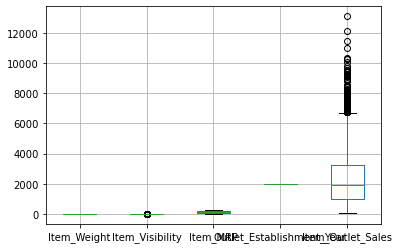

In [14]:
# check outliers
train.boxplot()
plt.show()

it seems there are no outliers except in the target column which we will ignore since it represents geniune data 

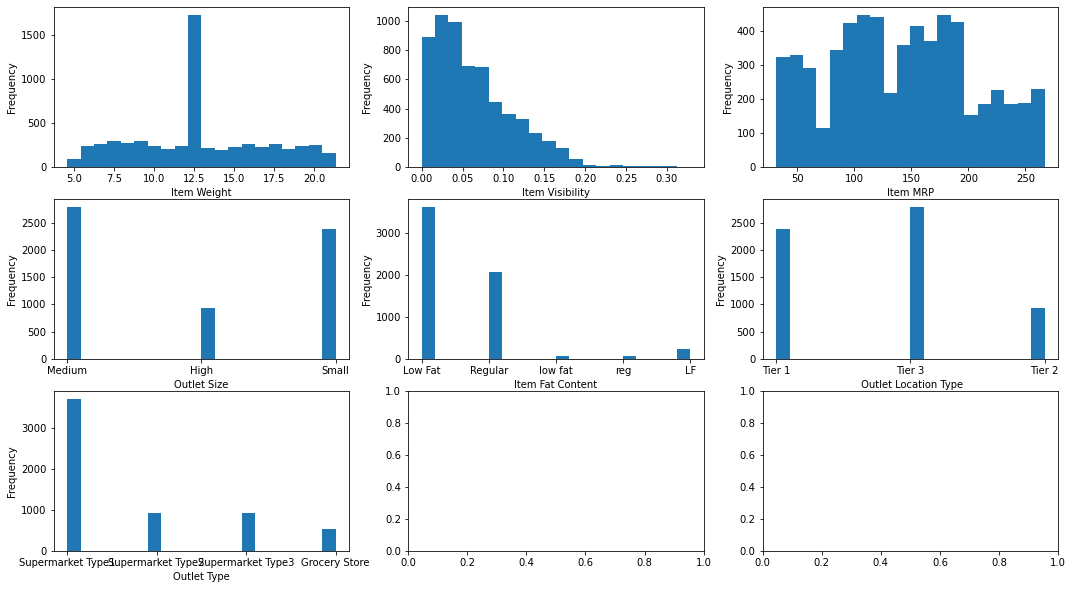

In [41]:

# check distribution of each column

# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(18,10))
axs = axs.flatten()

#item weight
axs[0].hist(train["Item_Weight"], bins=20)
axs[0].set_xlabel("Item Weight")
axs[0].set_ylabel("Frequency")

#item visibility
axs[1].hist(train["Item_Visibility"], bins=20)
axs[1].set_xlabel("Item Visibility")
axs[1].set_ylabel("Frequency")

# item MRP
axs[2].hist(train["Item_MRP"], bins=20)
axs[2].set_xlabel("Item MRP")
axs[2].set_ylabel("Frequency")

#Outlet Size
axs[3].hist(train["Outlet_Size"], bins=20)
axs[3].set_xlabel("Outlet Size")
axs[3].set_ylabel("Frequency")

#Item Fat Content
axs[4].hist(train["Item_Fat_Content"], bins=20)
axs[4].set_xlabel("Item Fat Content")
axs[4].set_ylabel("Frequency")

# Outlet Location Type
axs[5].hist(train["Outlet_Location_Type"], bins=20)
axs[5].set_xlabel(" Outlet Location Type")
axs[5].set_ylabel("Frequency")

# Outlet Type
axs[6].hist(train["Outlet_Type"], bins=20)
axs[6].set_xlabel("Outlet Type")
axs[6].set_ylabel("Frequency")


# Show the plots
plt.show()

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

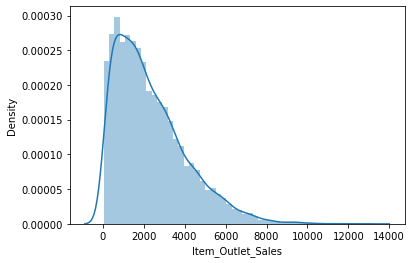

In [15]:
# check distribution of target column
sns.distplot(train['Item_Outlet_Sales'])

In [106]:
# scaling data using Standard Scaler

scaler = StandardScaler()

# select the numeric columns
numeric_cols1 = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
numeric_cols2 = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# fit and transform the selected columns
train[numeric_cols1] = scaler.fit_transform(train[numeric_cols1])

test[numeric_cols2] = scaler.fit_transform(test[numeric_cols2])
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_MRP_qcut,Item_Type_freq,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,-0.881033,1,-0.967450,Dairy,1.744524,OUT049,1999,1,0,Supermarket Type1,0.811077,Expensive,0.081139,1,0,0,1,0,0
1,DRC01,-1.710793,2,-0.902945,Soft Drinks,-1.494387,OUT018,2009,1,2,Supermarket Type2,-1.079139,Low,0.051039,0,1,0,0,1,0
2,FDN15,1.131996,1,-0.953220,Meat,0.005804,OUT049,1999,1,0,Supermarket Type1,-0.129443,Medium,0.050548,1,0,0,1,0,0
4,NCD19,-0.971864,1,-1.287832,Household,-1.404516,OUT013,1987,0,2,Supermarket Type1,-0.762573,Low,0.106167,1,0,0,1,0,0
5,FDP36,-0.612220,2,-1.287832,Baking Goods,-1.444060,OUT018,2009,1,2,Supermarket Type2,-1.014143,Low,0.075740,0,1,0,0,1,0


###### Bivariate Analysis

In [65]:
# create correlation matrix
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.008526,0.029214,-0.004779,0.008007
Item_Visibility,-0.008526,1.000000,-0.000651,-0.087452,-0.105854
Item_MRP,0.029214,-0.000651,1.000000,0.011632,0.588939
Outlet_Establishment_Year,-0.004779,-0.087452,0.011632,1.000000,-0.057850
Item_Outlet_Sales,0.008007,-0.105854,0.588939,-0.057850,1.000000


correlation matrix shows that sales have positive relation with product's MRP and product's weight although it is weak while it have negative relation with item visibility and establishement year of the store 

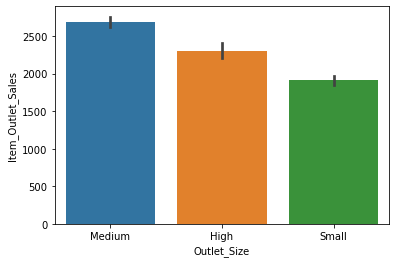

In [16]:
# Visualize outlet size with sales 
sns.barplot(x="Outlet_Size", y="Item_Outlet_Sales", data=train)
plt.show()

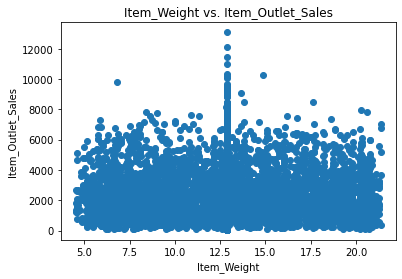

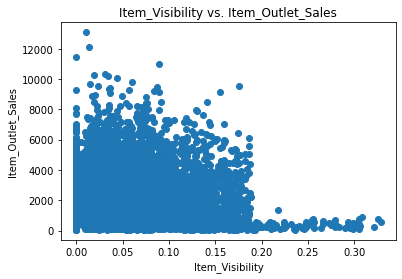

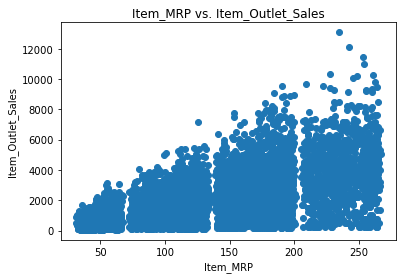

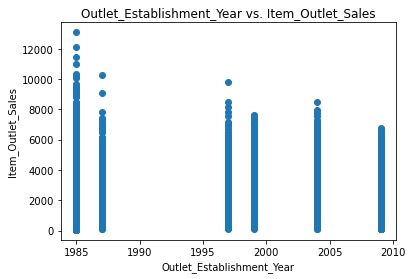

In [54]:
# Subset data 
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# remove target column 
numerical_cols.remove('Item_Outlet_Sales')

# Loop through each numerical column and create a scatter plot with target 
for col in numerical_cols:
    plt.scatter(train[col], train['Item_Outlet_Sales'])
    plt.title(f'{col} vs. Item_Outlet_Sales')
    plt.xlabel(col)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

from the plots we can confirm what was menioned in the correlation matrix above

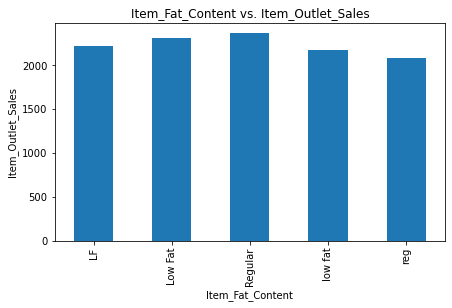

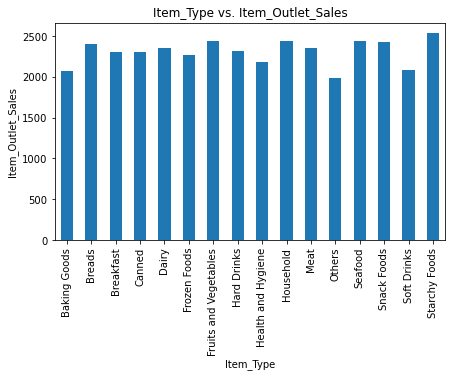

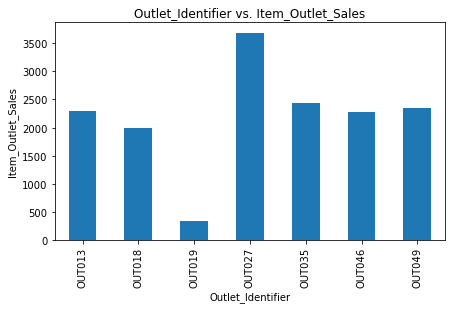

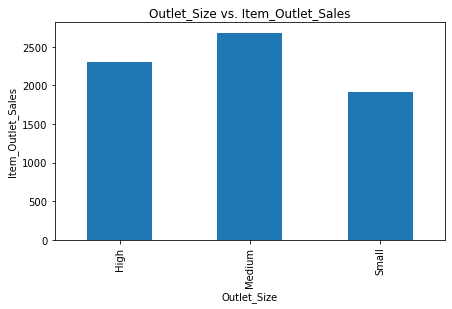

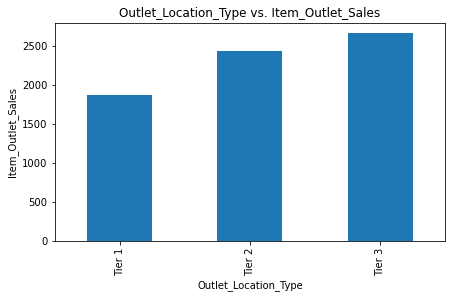

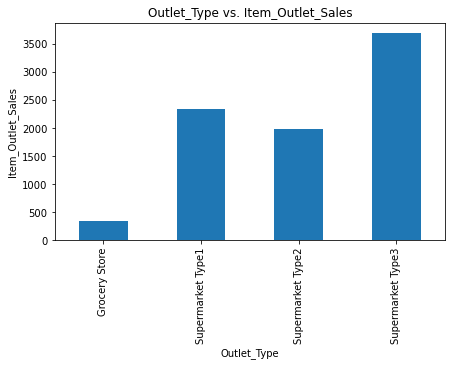

In [60]:
# subset data for categorical columns
cat_cols = ["Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

# Loop through each categorical column and create a bar plot with target 
for col in cat_cols:
    plt.figure(figsize=(7,4))
    train.groupby(col)["Item_Outlet_Sales"].mean().plot(kind="bar")
    plt.title(f"{col} vs. Item_Outlet_Sales")
    plt.xlabel(col)
    plt.ylabel("Item_Outlet_Sales")
    plt.show()

from the plots we can see that item fat content and type does not seem to affect the sales while outlet location type and outlet size seems to have positive effect on sales as tier 3 outlets and supermarket type 3 are selling the most 

#### Feature Engineering

In [89]:
# Label encoding for ordinal features

#training data 
# Import label encoder
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Outlet_Size'
train['Outlet_Size']= label_encoder.fit_transform(train['Outlet_Size'])
train['Outlet_Size'].unique()

# Encode labels in column 'Outlet_Location_Type'
train['Outlet_Location_Type']= label_encoder.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Location_Type'].unique()

# Encode labels in column 'Item_Fat_Content'
train['Item_Fat_Content']= label_encoder.fit_transform(train['Item_Fat_Content'])
train['Item_Fat_Content'].unique()

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_MRP_qcut,Item_Type_freq,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,-0.881033,1,-0.967450,Dairy,1.744524,OUT049,1999,1,0,Supermarket Type1,0.811077,Expensive,0.081139,1,0,0
1,DRC01,-1.710793,2,-0.902945,Soft Drinks,-1.494387,OUT018,2009,1,2,Supermarket Type2,-1.079139,Low,0.051039,0,1,0
2,FDN15,1.131996,1,-0.953220,Meat,0.005804,OUT049,1999,1,0,Supermarket Type1,-0.129443,Medium,0.050548,1,0,0
4,NCD19,-0.971864,1,-1.287832,Household,-1.404516,OUT013,1987,0,2,Supermarket Type1,-0.762573,Low,0.106167,1,0,0
5,FDP36,-0.612220,2,-1.287832,Baking Goods,-1.444060,OUT018,2009,1,2,Supermarket Type2,-1.014143,Low,0.075740,0,1,0


In [93]:
# test data 
# Encode labels in column 'Outlet_Size'
test['Outlet_Size']= label_encoder.fit_transform(test['Outlet_Size'])
test['Outlet_Size'].unique()

# Encode labels in column 'Outlet_Location_Type'
test['Outlet_Location_Type']= label_encoder.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Location_Type'].unique()

# Encode labels in column 'Item_Fat_Content'
test['Item_Fat_Content']= label_encoder.fit_transform(test['Item_Fat_Content'])
test['Item_Fat_Content'].unique()

test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,1,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,Supermarket Type1
1,FDW14,8.300,4,0.038428,Dairy,87.3198,OUT017,2007,3,1,Supermarket Type1
2,NCN55,14.600,1,0.099575,Others,241.7538,OUT010,1998,3,2,Grocery Store
3,FDQ58,7.315,1,0.015388,Snack Foods,155.0340,OUT017,2007,3,1,Supermarket Type1
4,FDY38,NaN,2,0.118599,Dairy,234.2300,OUT027,1985,1,2,Supermarket Type3


In [94]:
#Bining for item_MRP

#traing data 
groups = ['Low', 'Medium', 'High', 'Expensive']

train['Item_MRP_qcut'] = pd.qcut(train['Item_MRP'], q=4, labels=groups)
train[['Item_MRP', 'Item_MRP_qcut']].head()

#test data 
test['Item_MRP_qcut'] = pd.qcut(test['Item_MRP'], q=4, labels=groups)
test[['Item_MRP', 'Item_MRP_qcut']].head()

,Item_MRP,Item_MRP_qcut
0,107.8622,Medium
1,87.3198,Low
2,241.7538,Expensive
3,155.0340,High
4,234.2300,Expensive


In [116]:
#one hot encoding for Outlet_Type

#training data 
# create dummy variables 
#Outlet_Type_Dummies = pd.get_dummies(train['Outlet_Type'], prefix='Outlet_Type', drop_first=True)

# concatenate the dummy variables with the original data
#train = pd.concat([train, Outlet_Type_Dummies], axis=1)

# print first few rows 
train.head()

#test data
Outlet_Type_Dummies = pd.get_dummies(test['Outlet_Type'], prefix='Outlet_Type', drop_first=True)
test = pd.concat([test, Outlet_Type_Dummies], axis=1)
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_MRP_qcut,Item_Type_freq,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,FDW58,1.726792,1,-1.148188,Snack Foods,-0.532101,OUT049,1999,1,0,Supermarket Type1,Medium,0.138884,1,0
1,FDW14,-0.942389,4,-0.509484,Dairy,-0.865008,OUT017,2007,3,1,Supermarket Type1,Low,0.079916,1,0
2,NCN55,0.408281,1,0.755954,Others,1.637726,OUT010,1998,3,2,Grocery Store,Expensive,0.019539,0,0
3,FDQ58,-1.153565,1,-0.986280,Snack Foods,0.232358,OUT017,2007,3,1,Supermarket Type1,High,0.138884,1,0
5,FDH56,-0.620801,2,0.015951,Fruits and Vegetables,-0.381598,OUT046,1997,2,0,Supermarket Type1,Medium,0.137476,1,0


In [115]:
test.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_MRP_qcut,Item_Type_freq
0,FDW58,1.726792,1,-1.148188,Snack Foods,-0.532101,OUT049,1999,1,0,Supermarket Type1,Medium,0.138884
1,FDW14,-0.942389,4,-0.509484,Dairy,-0.865008,OUT017,2007,3,1,Supermarket Type1,Low,0.079916
2,NCN55,0.408281,1,0.755954,Others,1.637726,OUT010,1998,3,2,Grocery Store,Expensive,0.019539
3,FDQ58,-1.153565,1,-0.986280,Snack Foods,0.232358,OUT017,2007,3,1,Supermarket Type1,High,0.138884
5,FDH56,-0.620801,2,0.015951,Fruits and Vegetables,-0.381598,OUT046,1997,2,0,Supermarket Type1,Medium,0.137476


In [96]:
# Frequency Encoding for Item_Type

#traing data
item_type_counts = train['Item_Type'].value_counts(normalize=True)
train['Item_Type_freq'] = train['Item_Type'].map(item_type_counts)

# Print the sum of Item_Type_freq variable
print('The sum of Item_Type_freq variable:', train['Item_Type_freq'].sum())

# Display first 6 rows of Item_Type and Item_Type_freq columns
print(train[['Item_Type', 'Item_Type_freq']].head())

#test data

item_type_counts = test['Item_Type'].value_counts(normalize=True)
test['Item_Type_freq'] = test['Item_Type'].map(item_type_counts)
print('The sum of Item_Type_freq variable:', test['Item_Type_freq'].sum())
print(test[['Item_Type', 'Item_Type_freq']].head())

The sum of Item_Type_freq variable: 561.2195321446098
      Item_Type  Item_Type_freq
0         Dairy        0.081139
1   Soft Drinks        0.051039
2          Meat        0.050548
4     Household        0.106167
5  Baking Goods        0.075740
The sum of Item_Type_freq variable: 514.7032212638619
     Item_Type  Item_Type_freq
0  Snack Foods        0.138884
1        Dairy        0.079916
2       Others        0.019539
3  Snack Foods        0.138884
4        Dairy        0.079916


In [119]:
# assign changes to original dataset
train.to_csv('BMPO_train.csv', index=False)
test.to_csv('BMPO_test.csv', index=False)
#print(train.head())
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_MRP_qcut,Item_Type_freq,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,FDW58,1.726792,1,-1.148188,Snack Foods,-0.532101,OUT049,1999,1,0,Supermarket Type1,Medium,0.138884,1,0
1,FDW14,-0.942389,4,-0.509484,Dairy,-0.865008,OUT017,2007,3,1,Supermarket Type1,Low,0.079916,1,0
2,NCN55,0.408281,1,0.755954,Others,1.637726,OUT010,1998,3,2,Grocery Store,Expensive,0.019539,0,0
3,FDQ58,-1.153565,1,-0.986280,Snack Foods,0.232358,OUT017,2007,3,1,Supermarket Type1,High,0.138884,1,0
5,FDH56,-0.620801,2,0.015951,Fruits and Vegetables,-0.381598,OUT046,1997,2,0,Supermarket Type1,Medium,0.137476,1,0
